In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import gc
import datetime
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.simplefilter('ignore')
matplotlib.rcParams['figure.dpi'] = 100
sns.set()

In [2]:
# Extract a minibatch from the original training dataset
def TrTeSplit(X_tr, y_tr, size):
    X_trspl, X_tespl, y_trspl, y_tespl = train_test_split(X_tr, y_tr, test_size=size, random_state=0)
    X_trspl = X_trspl.reset_index(drop = True)
    X_tespl = X_tespl.reset_index(drop = True)
    y_trspl = y_trspl.reset_index(drop = True)
    y_tespl = y_tespl.reset_index(drop = True)
    
    return X_trspl, X_tespl, y_trspl, y_tespl

# Parameter Tunning using cross validation
def model_param_select(X, y, nfolds):
    max_depth = [20, 21, 22]
    min_samples_split = [2, 3]
    min_samples_leaf = [4, 5, 6]
    #the range is being reduced since after several runs
    #I have removed some redundant range value that will yield longer run time
    param_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}
    grid_search = GridSearchCV(DecisionTreeRegressor(random_state = 0), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

def RMSE(y_test, y_pred):
    rss=((y_test-y_pred)**2).sum()
    mse=np.mean((y_test-y_pred)**2)
    rmse = np.sqrt(np.mean((y_test-y_pred)**2))
    return rmse
    

In [3]:
# Load Data
#new_test = pd.read_csv('sample_train_tiny.csv')
new_train = pd.read_csv('sample_train_tiny.csv')

X_tr = new_train.drop(columns = ['meter_reading', 'timestamp'])
y_tr = new_train['meter_reading']
#X_te = new_test.drop(columns = ['timestamp'])
X_trspl, X_tespl, y_trspl, y_tespl = TrTeSplit(X_tr, y_tr, 0.33)

In [31]:
print(model_param_select(X_trspl, y_trspl, 10))

{'max_depth': 20, 'min_samples_leaf': 6, 'min_samples_split': 2}


237.32421458668134


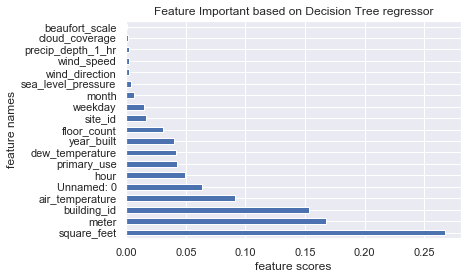

In [4]:
#Implement Tree model with the choosen parameter

#numbers_sizes = (i*10**exp for exp in range(2, 9) for i in range(1, 10))
#for i in numbers_sizes:
model = DecisionTreeRegressor(random_state = 1, max_depth = 20, min_samples_split = 6, min_samples_leaf = 2)
model.fit(X_trspl, y_trspl)
y_pred = model.predict(X_tespl)

rmse = RMSE(y_tespl, y_pred)
print(rmse)

feat_importances = pd.Series(model.feature_importances_, index=X_trspl.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Important based on Decision Tree regressor')
plt.xlabel('feature scores')
plt.ylabel('feature names')
plt.show()

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

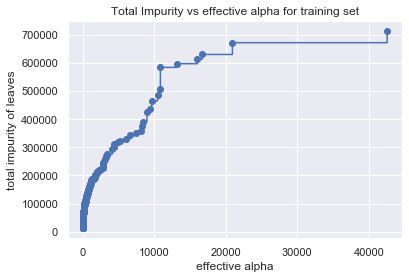

In [5]:
# Total impurity of leaves vs effective alphas of pruned tree
path = model.cost_complexity_pruning_path(X_trspl, y_trspl)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [6]:
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    model.fit(X_trspl, y_trspl)
    models.append(model)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      models[-1].tree_.node_count, ccp_alphas[-1]))

KeyboardInterrupt: 

In [ ]:
models = models[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [model.tree_.node_count for model in models]
depth = [model.tree_.max_depth for model in models]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
#Accuracy vs alpha for training and testing sets
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [9]:
X_train = pd.read_csv(r'Dataset/new_train.csv')

In [10]:
y_train = X_train['meter_reading']
X_train = X_train.drop(columns = ['meter_reading', 'timestamp'])
X_test = X_test.drop(columns = ['meter_reading', 'timestamp'])

In [13]:
X_trspl, X_tespl, y_trspl, y_tespl = TrTeSplit(X_train, y_train, 0.33)

51318.32419808552


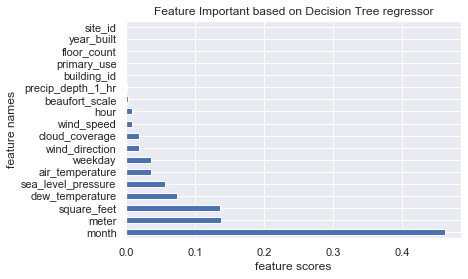

In [14]:
#Implement Tree model with the choosen parameter

#numbers_sizes = (i*10**exp for exp in range(2, 9) for i in range(1, 10))
#for i in numbers_sizes:
model = DecisionTreeRegressor(random_state = 1, max_depth = 20, min_samples_split = 6, min_samples_leaf = 2)
model.fit(X_trspl, y_trspl)
y_pred = model.predict(X_tespl)

rmse = RMSE(y_tespl, y_pred)
print(rmse)

feat_importances = pd.Series(model.feature_importances_, index=X_trspl.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Important based on Decision Tree regressor')
plt.xlabel('feature scores')
plt.ylabel('feature names')
plt.show()